<a href="https://colab.research.google.com/github/norayehia/Machine-learning-secuirty-data/blob/main/deciontree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
df=pd.read_csv('/content/traindata.csv')
df.head(5)

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,0,tcp,http,SF,295,2584,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.67,101,255,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,1,0,tcp,http,SF,312,839,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,7,0.0,0.0,0.0,0.0,1.0,0.0,0.29,223,255,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,2,0,tcp,ftp,SF,1225,2451,0,0,0,28,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,116,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,3,0,tcp,http,SF,293,296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.50,216,255,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,4,0,tcp,X11,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.5,1.0,0.5,1.0,0.00,115,1,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0


In [ ]:
import pandas as pd
test=pd.read_csv('/content/testdata.csv')
test.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,4,tcp,pop_3,SF,30,93,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,232,0.91,0.04,0.00,0.00,0.0,0.0,0.0,0.0,16
1,1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,240,5,1.0,1.0,0.0,0.0,0.02,0.07,0.0,255,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,21
2,2,0,udp,private,SF,52,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,17
3,3,0,tcp,http,SF,367,588,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,8,255,1.00,0.00,0.12,0.06,0.0,0.0,0.0,0.0,21
4,4,0,icmp,ecr_i,SF,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,311,311,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18


In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#check balance

In [ ]:
df['Class'].value_counts()

0    12001
1    11001
Name: Class, dtype: int64

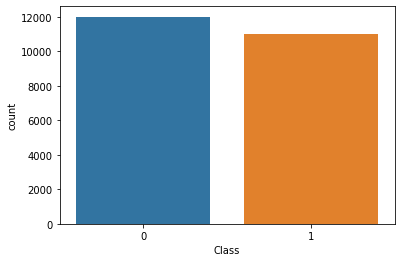

In [ ]:
sns.countplot(data=df, x='Class')

#check features

In [ ]:
df.corr()['Class'].sort_values(ascending=False)

Class                          1.000000
dst_host_srv_serror_rate       0.649963
dst_host_serror_rate           0.647599
serror_rate                    0.646637
srv_serror_rate                0.644097
count                          0.576296
dst_host_count                 0.368795
dst_host_srv_rerror_rate       0.258675
rerror_rate                    0.258556
dst_host_rerror_rate           0.258102
srv_rerror_rate                0.257691
dst_host_diff_srv_rate         0.236590
diff_srv_rate                  0.192442
wrong_fragment                 0.096417
dst_host_same_src_port_rate    0.090074
dst_host_srv_diff_host_rate    0.063555
duration                       0.049368
urgent                         0.006887
src_bytes                      0.005829
srv_count                      0.002368
ID                             0.002328
num_failed_logins              0.002050
land                           0.000406
dst_bytes                     -0.010218
hot                           -0.012829


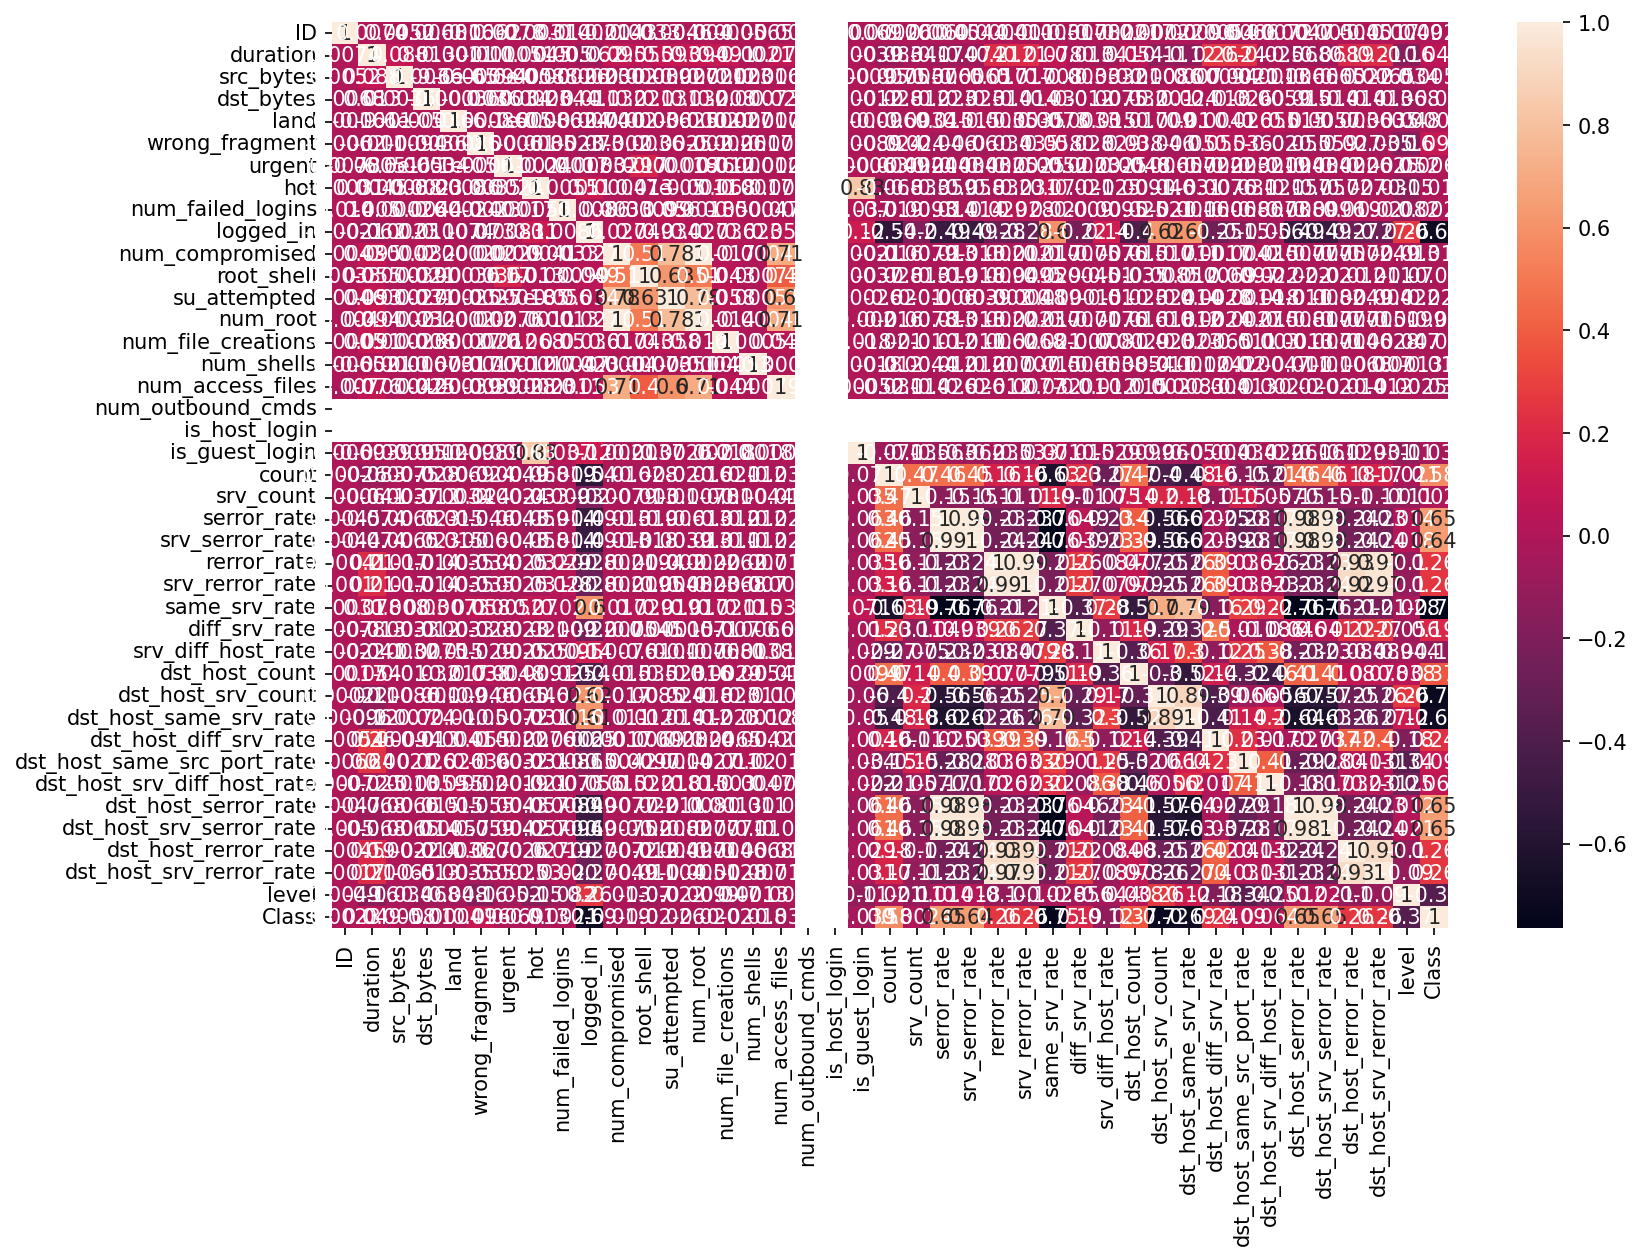

In [ ]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df.corr(), annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


In [ ]:
def preprocessing_df(df):

  
   df['service']=label_encoder.fit_transform(df['service'])
   df['protocol_type']=label_encoder.fit_transform(df['protocol_type'])
   df['flag']=label_encoder.fit_transform(df['flag'])
   #log
   """
   df['service']=np.log10(df['service'])
   df['protocol_type']=np.log10(df['protocol_type'])
   df['flag']=np.log(df['flag'])
   df.replace([np.inf, -np.inf], np.nan, inplace=True)
   df = df.fillna(0)
   """
   df.drop(['land','duration','wrong_fragment','num_failed_logins','num_compromised','su_attempted','num_root','root_shell','num_shells','urgent','num_outbound_cmds','is_host_login','ID'], axis='columns', inplace=True)
   return df



In [ ]:
df.shape

(23002, 31)

preprocessing train

In [ ]:
df=preprocessing_df(df)


the same peprocessing on test

In [ ]:
test=preprocessing_df(test)

In [ ]:
df.shape

(23002, 31)

In [ ]:
df

,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,num_file_creations,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0.00000,1.342423,0.954243,295,2584,0,1,0,0,0,2,3,0.0,0.0,0.0,0.0,1.00,0.00,0.67,101,255,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,0.00000,1.342423,0.954243,312,839,0,1,0,0,0,5,7,0.0,0.0,0.0,0.0,1.00,0.00,0.29,223,255,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,0.00000,1.255273,0.954243,1225,2451,28,1,0,0,1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,116,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,0.00000,1.342423,0.954243,293,296,0,1,0,0,0,3,4,0.0,0.0,0.0,0.0,1.00,0.00,0.50,216,255,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,0.00000,0.000000,0.000000,0,0,0,0,0,0,0,2,1,0.0,0.0,0.5,1.0,0.50,1.00,0.00,115,1,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,0.00000,1.342423,0.000000,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.00,0.00,0.00,4,227,1.00,0.00,0.25,0.15,0.0,0.0,1.00,0.87,21,0
22998,0.00000,1.755875,0.698970,0,0,0,0,0,0,0,206,13,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,13,0.05,0.05,0.00,0.00,1.0,1.0,0.00,0.00,19,1
22999,0.00000,1.662758,0.698970,0,0,0,0,0,0,0,122,2,1.0,1.0,0.0,0.0,0.02,0.06,0.00,255,16,0.06,0.08,0.00,0.00,1.0,1.0,0.00,0.00,21,1
23000,0.30103,1.612784,0.954243,516,4,0,0,0,0,0,270,270,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,17,0


In [ ]:
X = df.drop(['Class'], axis=1)
"""
X=np.log10(X)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(0)
"""

y = df['Class']



In [ ]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=0,stratify=y)

#decision regresssor
class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)[source]¶

In [ ]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=15,random_state=2)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9968481686773177
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4801
           1       1.00      1.00      1.00      4400

    accuracy                           1.00      9201
   macro avg       1.00      1.00      1.00      9201
weighted avg       1.00      1.00      1.00      9201



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4788,   13],
       [  16, 4384]])

In [ ]:
#clf = DecisionTreeRegressor(max_depth=15,random_state=9)
clfd= DecisionTreeRegressor(max_depth=15,random_state=9)
clfd.fit(X,y)

#which on decision tree predictiond give me 91 on kaggle

In [ ]:
y_predd=clf.predict(test)
pd.DataFrame(y_predd, columns=['Class']).to_csv('predictiond3.csv')

/////////////////////////////////////////////////////////////

The other algorithms not give me higher than this

#mlp
Supported activations are ['identity', 'logistic', 'relu', 'softmax', 'tanh']
the best accuracy get with logistic

In [ ]:
from sklearn.neural_network import MLPClassifier

clfm =MLPClassifier(solver='lbfgs', hidden_layer_sizes=200,max_iter=1000, shuffle=True, random_state=7,activation='logistic', early_stopping=True, alpha=1e-5)

clfm.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=7, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_predm=clfm.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_predm)

array([[4724,   77],
       [ 123, 4277]])

In [ ]:
print(classification_report(y_test, y_predm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4801
           1       0.98      0.97      0.98      4400

    accuracy                           0.98      9201
   macro avg       0.98      0.98      0.98      9201
weighted avg       0.98      0.98      0.98      9201



In [ ]:
y_predm=clfm.predict(test)
pd.DataFrame(y_predm, columns=['Class']).to_csv('predictionm.csv')

#svm

In [ ]:
from sklearn.svm import SVC

In [ ]:
y_train

19305    0
904      1
4761     1
16521    0
725      0
        ..
8366     0
19656    1
946      1
22690    1
3420     0
Name: Class, Length: 13801, dtype: int64

In [ ]:
model = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=9, shrinking=True, tol=0.001,
    verbose=False)
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)



              precision    recall  f1-score   support

           0       0.65      1.00      0.79      4801
           1       1.00      0.42      0.59      4400

    accuracy                           0.72      9201
   macro avg       0.83      0.71      0.69      9201
weighted avg       0.82      0.72      0.69      9201



array([[4801,    0],
       [2570, 1830]])

#rondomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomForest = RandomForestClassifier( n_estimators=100, max_depth=9,random_state=9)
randomForest.fit(X_train,y_train)
predictions3 =randomForest.predict(X_test)
print(classification_report(y_test, predictions3))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4801
           1       1.00      1.00      1.00      4400

    accuracy                           1.00      9201
   macro avg       1.00      1.00      1.00      9201
weighted avg       1.00      1.00      1.00      9201



array([[4801,    0],
       [2570, 1830]])

In [ ]:
y_predr=randomForest.predict(test)
pd.DataFrame(y_predr, columns=['Class']).to_csv('predictionr.csv')